In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 data=pd.read_csv("housing.csv")

In [4]:
data.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [7]:
train_data=X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

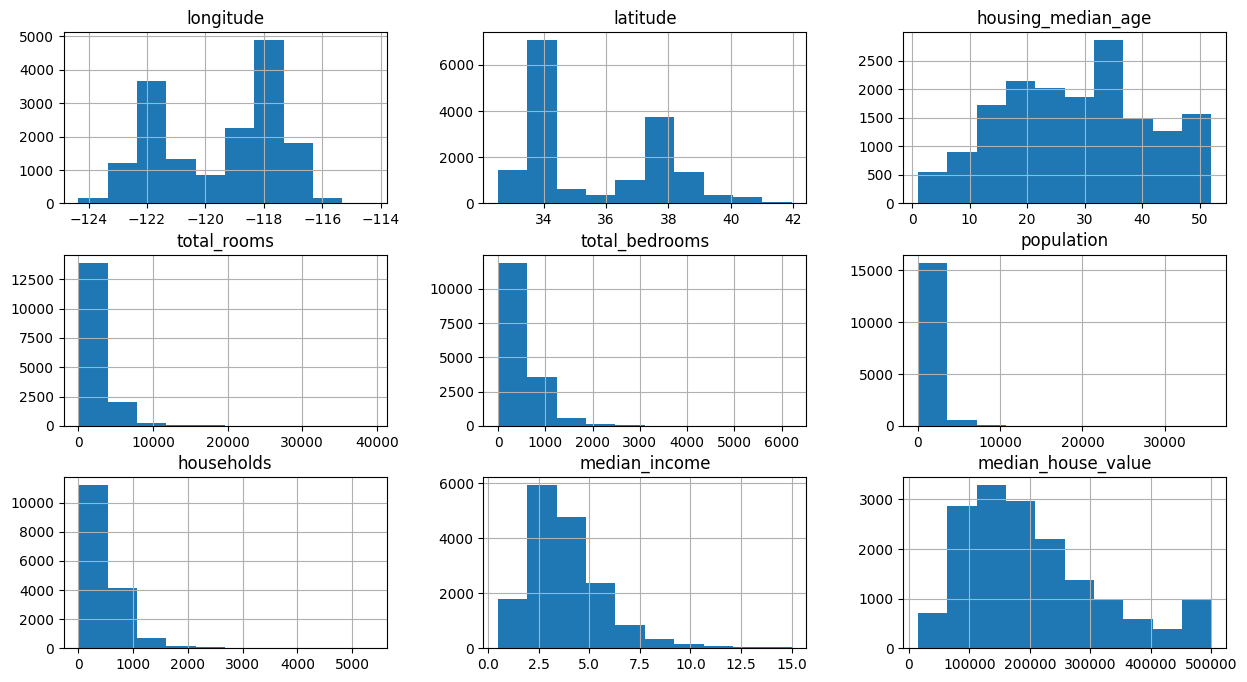

In [8]:
train_data.hist(figsize=(15,8))

In [9]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)
train_data['population']=np.log(train_data['population']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

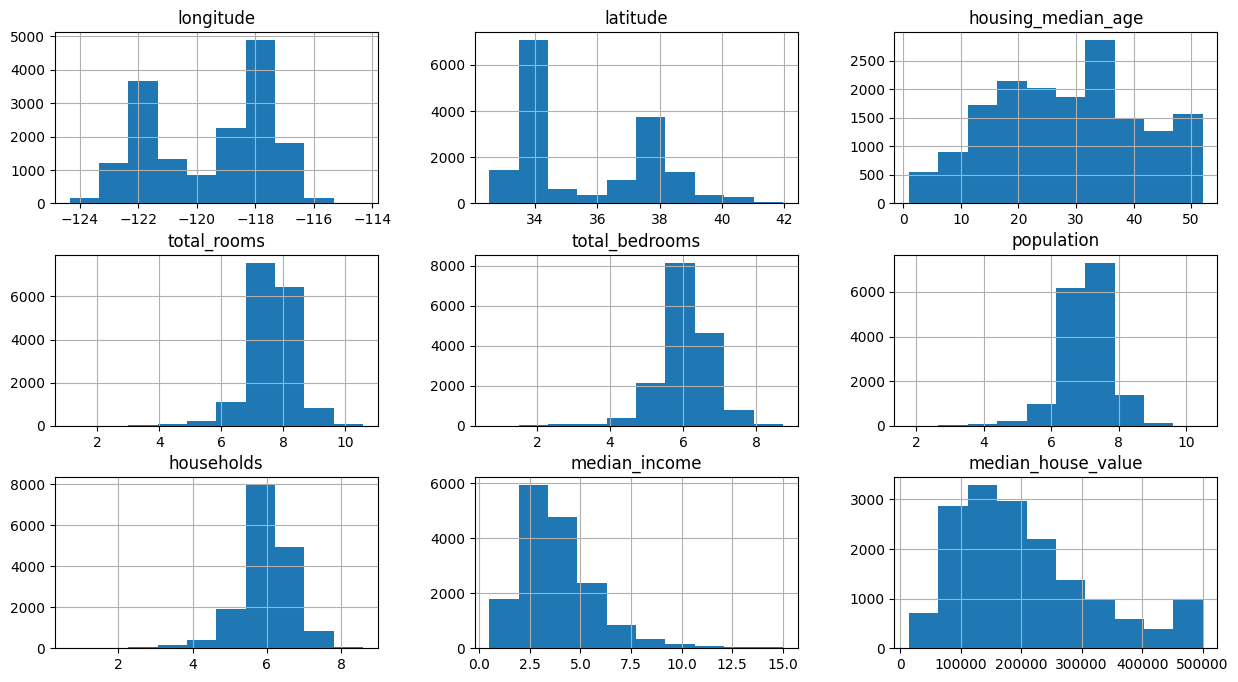

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

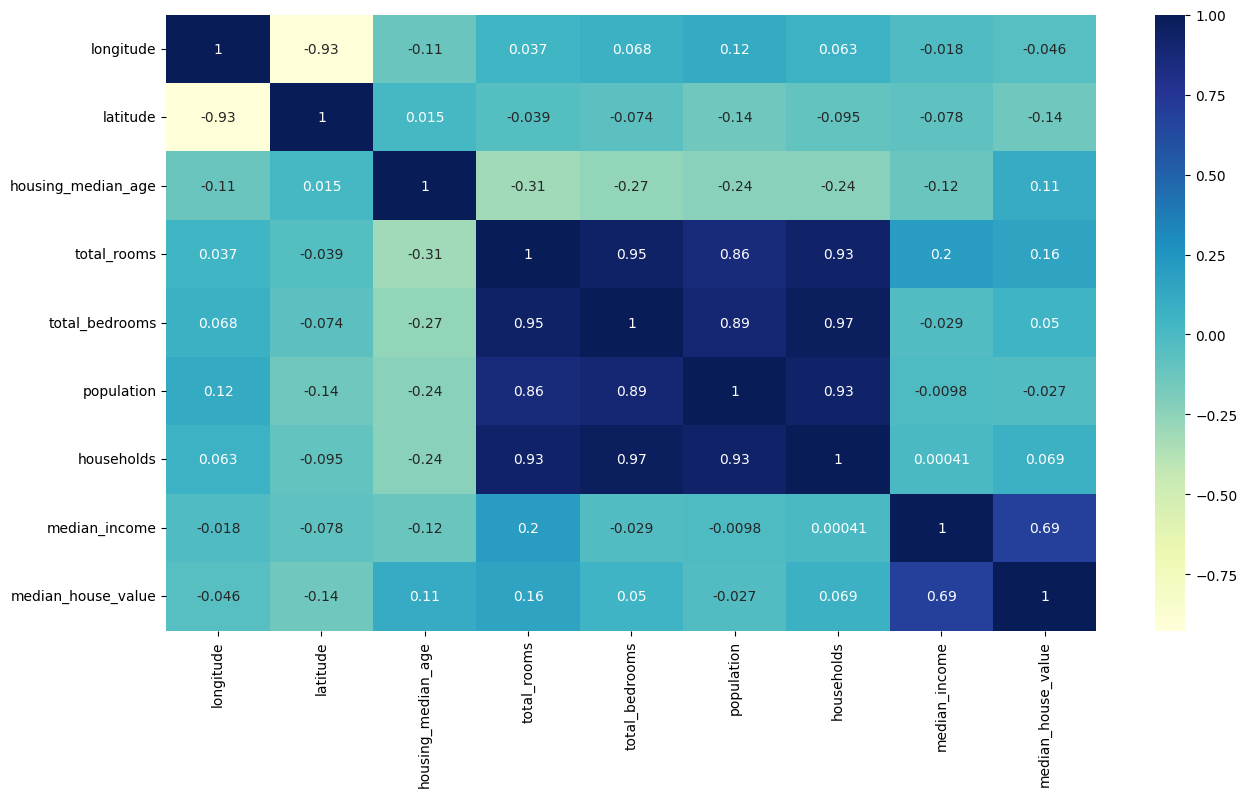

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [12]:
train_data=train_data.join(pd.get_dummies(        train_data.ocean_proximity,
        prefix="ocean_proximity",
        dtype=int
)).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11685,-118.01,33.88,19.0,7.268920,5.971262,6.993015,5.834811,3.3690,269600.0,1,0,0,0,0
8086,-118.20,33.81,46.0,7.236339,5.541264,6.610696,5.488938,4.6458,212100.0,0,0,0,0,1
19920,-119.33,36.32,16.0,8.111328,6.733402,7.578657,6.638568,1.6148,86600.0,0,1,0,0,0
11677,-118.00,33.86,32.0,7.058758,5.283204,6.335054,5.187386,3.8750,203000.0,1,0,0,0,0
6360,-117.98,34.14,24.0,7.375882,5.963579,7.192934,5.866468,3.0417,148000.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,-118.31,34.01,50.0,7.288928,5.872118,6.816736,5.683580,1.7386,109400.0,1,0,0,0,0
18078,-122.01,37.27,28.0,8.249575,6.161207,7.255591,6.175867,10.6750,500001.0,1,0,0,0,0
11917,-117.41,33.95,37.0,7.369601,5.648974,6.516193,5.723585,2.9583,132100.0,0,1,0,0,0
5596,-118.24,33.80,28.0,6.456770,5.135798,6.670766,4.969813,3.6161,131300.0,0,0,0,0,1


<Axes: >

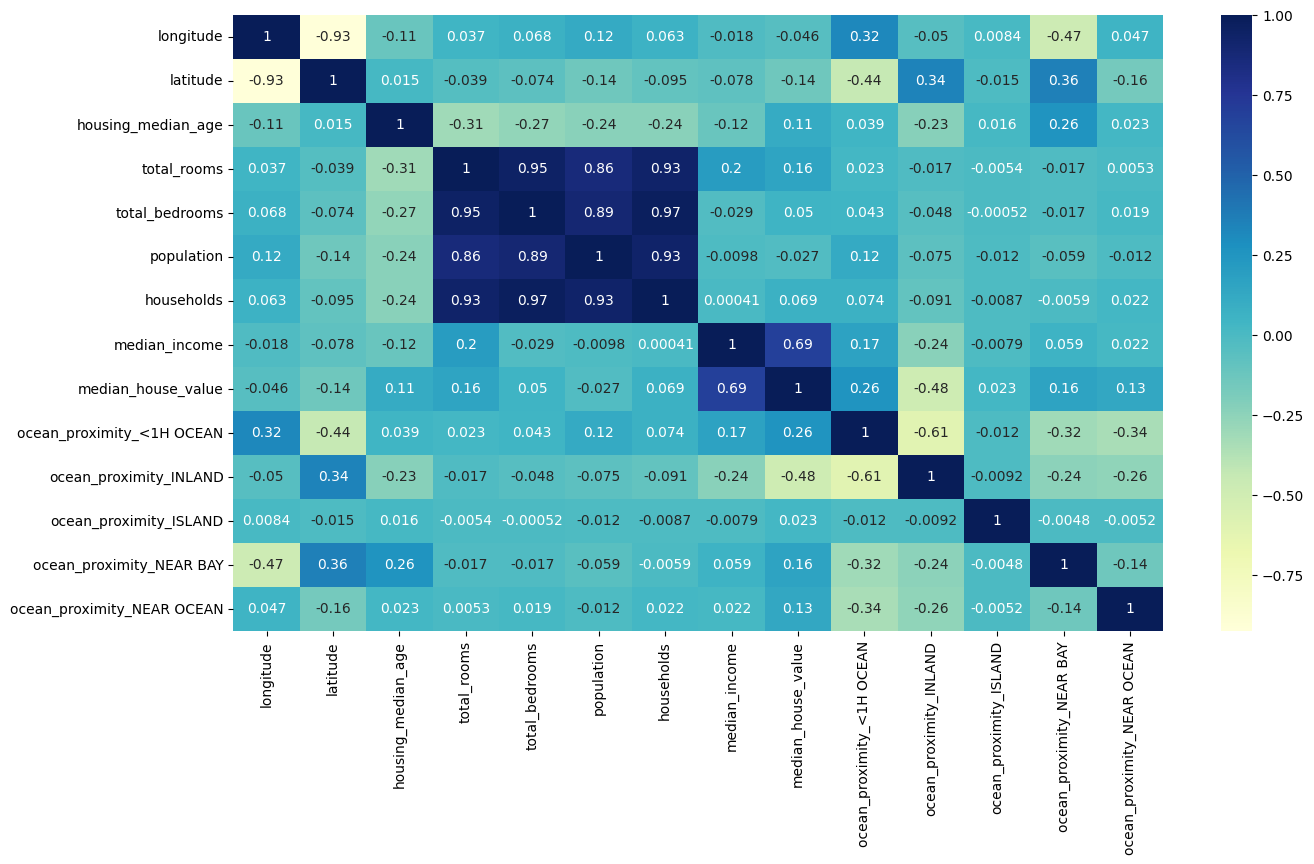

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

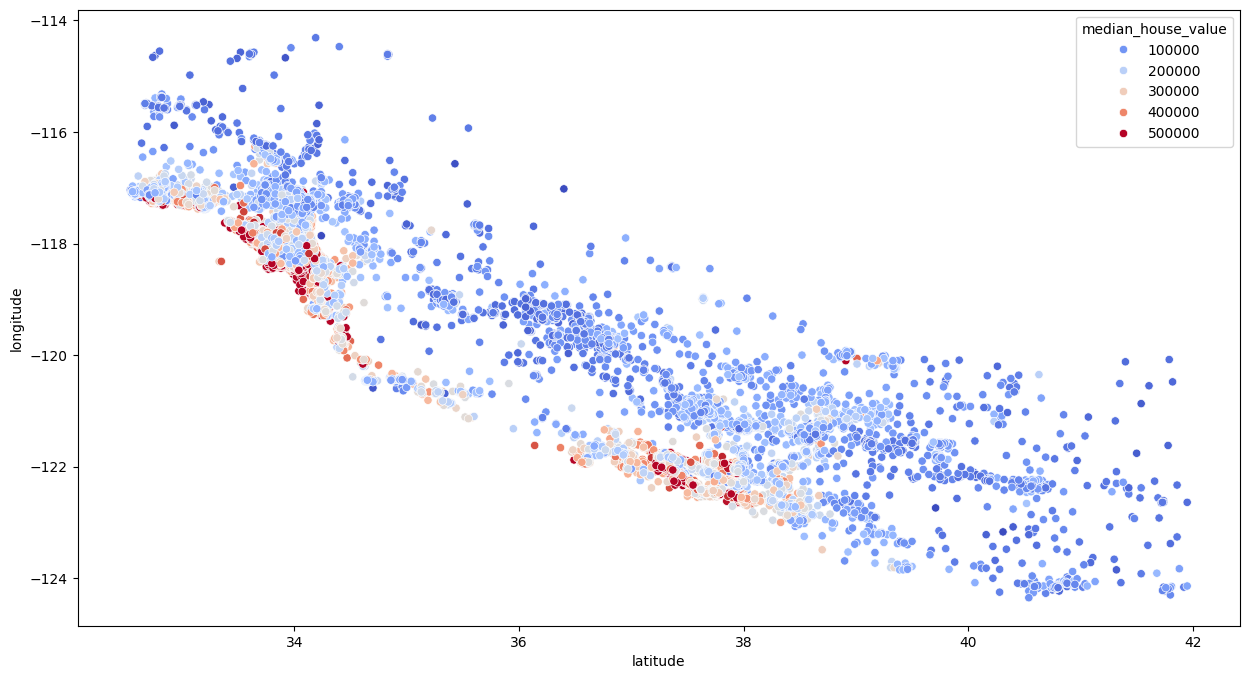

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [15]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

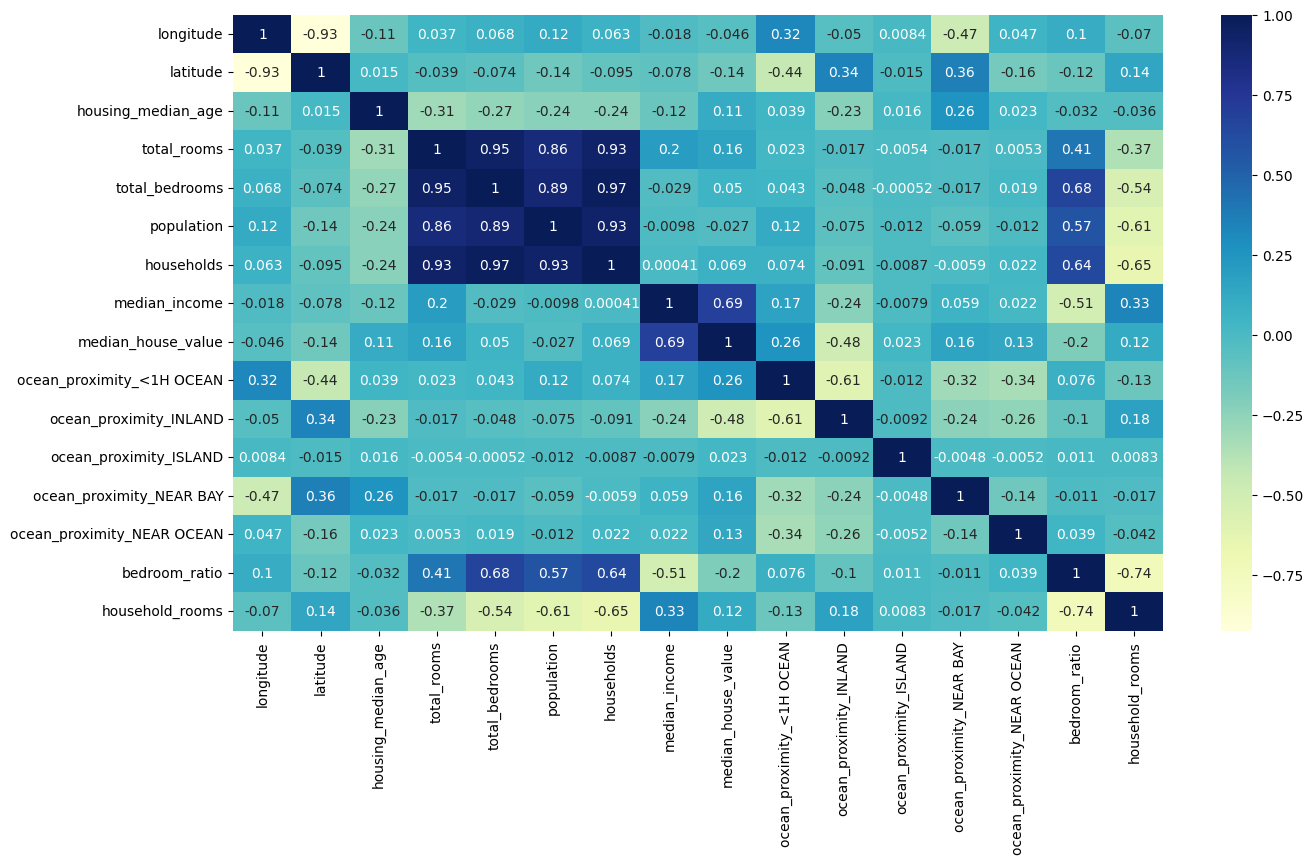

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train,y_train=train_data.drop(['median_house_value'],axis=True),train_data['median_house_value']
X_train = X_train.drop(['bedroom_ratio', 'household_rooms'], axis=1)


X_train_s=scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train_s,y_train)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
11685,-118.01,33.88,19.0,7.268920,5.971262,6.993015,5.834811,3.3690,1,0,0,0,0
8086,-118.20,33.81,46.0,7.236339,5.541264,6.610696,5.488938,4.6458,0,0,0,0,1
19920,-119.33,36.32,16.0,8.111328,6.733402,7.578657,6.638568,1.6148,0,1,0,0,0
11677,-118.00,33.86,32.0,7.058758,5.283204,6.335054,5.187386,3.8750,1,0,0,0,0
6360,-117.98,34.14,24.0,7.375882,5.963579,7.192934,5.866468,3.0417,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,-118.31,34.01,50.0,7.288928,5.872118,6.816736,5.683580,1.7386,1,0,0,0,0
18078,-122.01,37.27,28.0,8.249575,6.161207,7.255591,6.175867,10.6750,1,0,0,0,0
11917,-117.41,33.95,37.0,7.369601,5.648974,6.516193,5.723585,2.9583,0,1,0,0,0
5596,-118.24,33.80,28.0,6.456770,5.135798,6.670766,4.969813,3.6161,0,0,0,0,1


In [18]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['households']=np.log(test_data['households']+1)
test_data['population']=np.log(test_data['population']+1)


test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,  prefix="ocean_proximity",
        dtype=int)).drop(['ocean_proximity'],axis=1)



In [19]:
X_test,y_test=test_data.drop(['median_house_value'],axis=True),test_data['median_house_value']
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # assume that category wasn't present in test data

# Reorder test columns to match train columns
X_test = X_test[X_train.columns]
X_test_s = scaler.transform(X_test)


In [20]:
print("R²:", reg.score(X_test_s, y_test))


R²: 0.6755466021614946


In [23]:
from sklearn.ensemble import RandomForestRegressor

forest =RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [24]:
forest.score(X_test_s,y_test)

0.8216714440724718

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)


In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s,Y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)



In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {model.score(X_test, y_test):.2f}")


In [ ]:
xgb.plot_importance(model)
plt.show()
